# Product category clustering

IMPORTS

In [18]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

LOADING THE DATASET

In [2]:
df = pd.read_csv('reviews_sentiment.csv')

print(df.dtypes)
df.head()


category          object
product_names     object
review            object
star_rating      float64
sentiment         object
dtype: object


,category,product_names,review,star_rating,sentiment
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,5.0,positive
1,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,5.0,positive
2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,5.0,positive
3,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,4.0,positive
4,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,5.0,positive


## PREPROCESSING

In [3]:
#creating dataframe
cat = pd.DataFrame()

#getting the columns
cat[['product_names', 'category']] = df[['product_names', 'category']]

#initializing Stemmer
stemmer = PorterStemmer()

#function for preprocessing with Stemming
def preprocess_text(text):
    #to lowercase
    text = text.lower()
    #remove all non alphanumerical characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    #tokenize
    tokens = word_tokenize(text)
    #stemming
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    #tokens back into a single string
    return ' '.join(stemmed_tokens)


cat['product_names_processed'] = cat['product_names'].apply(preprocess_text)
cat['category_processed'] = cat['category'].apply(preprocess_text)

cat.head()

,product_names,category,product_names_processed,category_processed
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsal tabletsfir tabletsta...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsal tabletsfir tabletsta...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsal tabletsfir tabletsta...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsal tabletsfir tabletsta...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",allnew fire hd 8 tablet 8 hd display wifi 16 g...,electronicsipad tabletsal tabletsfir tabletsta...


### TF-IDF

In [4]:
#vectorizer initializing
vectorizer1 = TfidfVectorizer(min_df = 5,max_df =0.8, max_features=1000,ngram_range=(1,3))
vectorizer2 = TfidfVectorizer(min_df = 5,max_df =0.8, max_features=1000,ngram_range=(1,3))

#vectorization
tfidf1 = vectorizer1.fit_transform(cat['product_names_processed'])
tfidf2 = vectorizer2.fit_transform(cat['category_processed'])

#combining feature matrix
combined_tfidf = hstack([tfidf1, tfidf2])

### KMEANS CLUSTERING

In [7]:
#test dataframe for visualisation
test = pd.DataFrame()
test['given_categories'] = df['category']

Modelnitianalizing and predicting

In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
test['category'] = kmeans.fit_predict(combined_tfidf)

## Evaluation

In [11]:
#computing silhouette_score
score = silhouette_score(combined_tfidf, test['category'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.6554080171390321


In [24]:
test.head()

,given_categories,category
0,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2
1,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2
2,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2
3,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2
4,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",2


Getting the top 10 words per cluster

In [16]:
# Get feature names from both vectorizers
feature_names1 = vectorizer1.get_feature_names_out()
feature_names2 = vectorizer2.get_feature_names_out()

# Concatenate feature names into one array
feature_names = np.concatenate([feature_names1, feature_names2])

# Display top 10 terms for each cluster
n_top_terms = 10
for i, centroid in enumerate(centroids):
    top_indices = centroid.argsort()[-n_top_terms:][::-1]
    top_terms = feature_names[top_indices]
    print(f"Cluster {i}: {', '.join(top_terms)}")

Cluster 0: display wifi gb, wifi gb, wifi gb includ, fire tablet display, fire tablet, tablet display wifi, tablet display, special offer magenta, offer magenta, magenta
Cluster 1: echo, echo white, white, home, amazon fire tv, fire tv, tv, amazon fire, audio, white echo white
Cluster 2: tablet, tabletsfir, hd, tabletsal tabletsfir tabletstabletscomput, tabletstabletscomput tablet, tabletsfir tabletstabletscomput, tabletsal tabletsfir, tabletsfir tabletstabletscomput tablet, electronicsipad tabletsal tabletsfir, electronicsipad tabletsal
Cluster 3: paperwhit, monochrom paperwhit touchscreen, ebook, gb monochrom, touchscreen wifi black, reader gb monochrom, touchscreen wifi, monochrom paperwhit, reader gb, amazon kindl paperwhit


Plotting the clusters

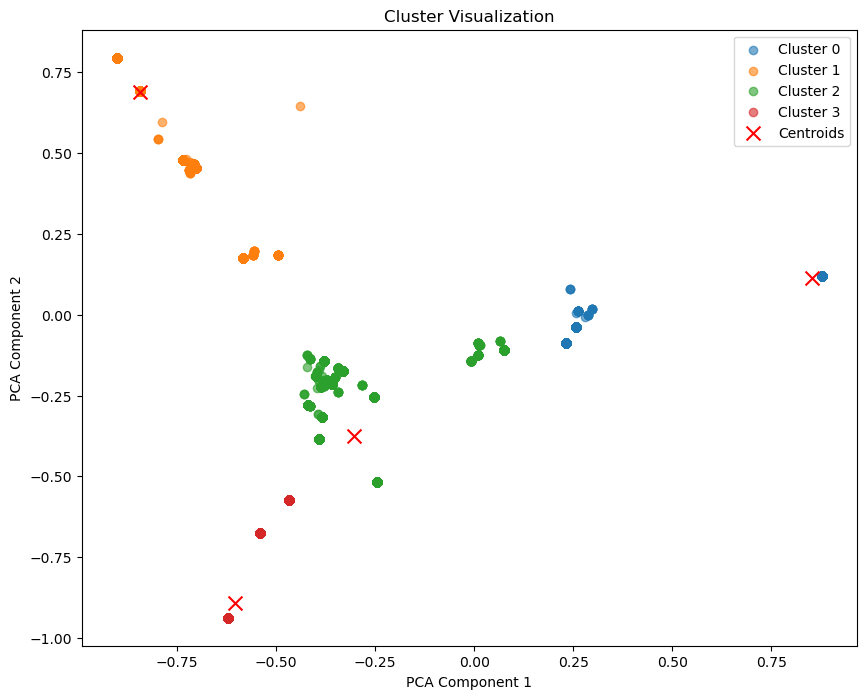

In [19]:
# Reduce dimensions with PCA
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(combined_tfidf.toarray())

# Scatter plot
plt.figure(figsize=(10, 8))
for i in range(kmeans.n_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0], 
                reduced_data[kmeans.labels_ == i, 1], 
                label=f"Cluster {i}", alpha=0.6)

plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], 
            pca.transform(kmeans.cluster_centers_)[:, 1], 
            color='red', marker='x', s=100, label='Centroids')

plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

## FINAL CSV

In [26]:
#function to name the clusters
def cluster_naming(cluster):
    if cluster == 0 or cluster == 2:
        return 'Tablets and Electronics'
    elif cluster == 1:
        return 'Smart Home and Entertainment'
    else:
        return 'E-Readers'

In [27]:
#creating dataframe
final_csv = pd.DataFrame()

#getting the columns
final_csv[['Product_name', 'Review', 'Sentiment']] = df[['product_names', 'review', 'sentiment']]
final_csv['Category'] = test['category'].apply(cluster_naming)

#exporting
final_csv.to_csv('Final.csv', index=False)

## Plot to illustrate presentation

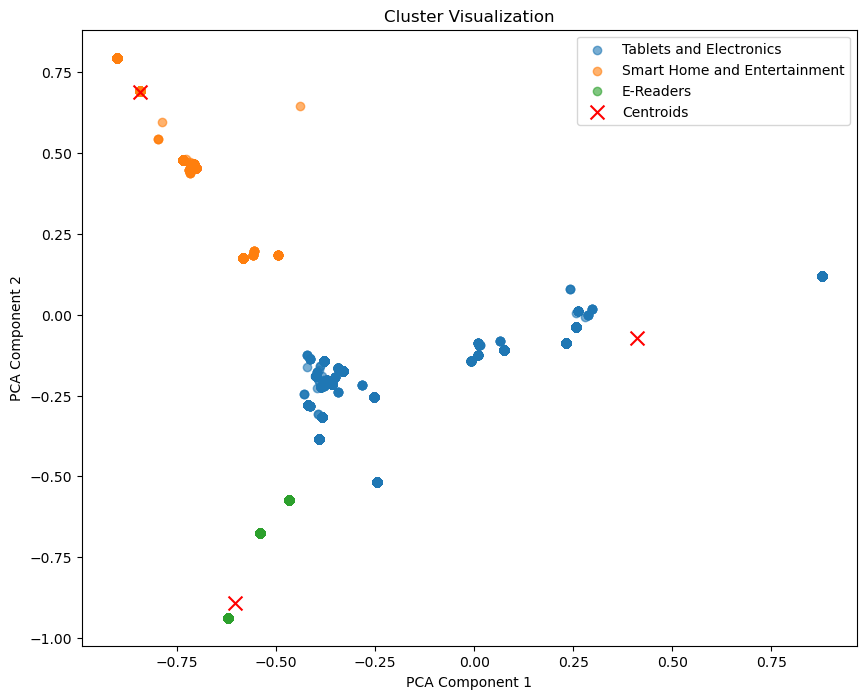

In [23]:
# Merge Cluster 0 and Cluster 2
merged_labels = kmeans.labels_.copy()
merged_labels[np.isin(kmeans.labels_, [0, 2])] = 0  # Merge Cluster 0 and 2 into one

# Define cluster names
cluster_names = {
    0: "Tablets and Electronics",
    1: "Smart Home and Entertainment",
    3: "E-Readers",
}

# Reduce dimensions with PCA
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(combined_tfidf.toarray())

# Scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(merged_labels)

# Iterate through unique clusters (only 3 now)
for i in unique_labels:
    plt.scatter(reduced_data[merged_labels == i, 0], 
                reduced_data[merged_labels == i, 1], 
                label=cluster_names[i], alpha=0.6)

# Calculate centroids for the merged clusters
merged_centroids = []
for i in unique_labels:
    cluster_indices = np.where(merged_labels == i)[0]
    centroid = combined_tfidf[cluster_indices].mean(axis=0)  # Average vectors for merged clusters
    merged_centroids.append(np.asarray(centroid).flatten())  # Ensure proper array format

# Convert centroids to NumPy array
merged_centroids = np.vstack(merged_centroids)
reduced_centroids = pca.transform(merged_centroids)

# Plot centroids
plt.scatter(reduced_centroids[:, 0], 
            reduced_centroids[:, 1], 
            color='red', marker='x', s=100, label='Centroids')

plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()